In [3]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))

# Lets visualize our dataset

In [4]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

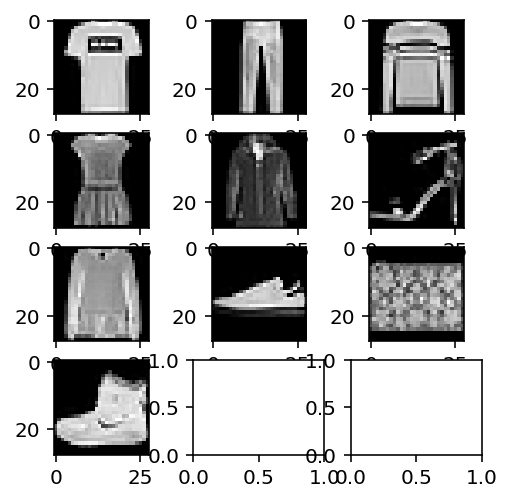

In [6]:
X_train_orig = X_train.copy()
fig, axes = plt.subplots(4,3, figsize = (4,4))
ax = axes.flatten()
for i in range(10):
    ax[i].imshow(X_train[y_train == i][0], cmap = "gray")


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0].shape

(28, 28)

## Data Preparation:

In [9]:
from keras.utils import np_utils

img_rows, img_cols = 28, 28
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Transfer from label to categorial
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        # 60000 samples, 28 cols, 28 rows, 1 dimension

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


## Simple CNN:

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [12]:
#Initializing the values for the convolution neural network
num_rows, num_col = 28, 28

num_epoch = 2
batch_size = 32
# number of convolutional filters to use
num_filters = 32
# size of pooling area for max pooling
num_pool = 2
# convolution kernel size
num_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

## Step 1: Define model

In [22]:
model = Sequential()
model.add(Convolution2D(num_filters, num_conv, num_conv,
                        border_mode='valid',
                        input_shape=(num_rows, num_col, 1),
                        activation='relu'))

model.add(Convolution2D(num_filters, num_conv, num_conv,
                        border_mode='valid',
                        input_shape=(num_rows, num_col, 1),
                        activation='relu'))
model.add(MaxPooling2D(pool_size=(num_pool, num_pool)))
model.add(Flatten())
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.4, noise_shape=None, seed=None))
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

/Users/Stav/anaconda2/envs/deeplearning/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
/Users/Stav/anaconda2/envs/deeplearning/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 4608)              0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                294976    
__________

## Step 2: Compile

In [23]:
fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, batch_size=batch_size, 
          nb_epoch=10,verbose=1,
          validation_data=(X_test, y_test))

/Users/Stav/anaconda2/envs/deeplearning/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 189s 3ms/step - loss: 1.1457 - acc: 0.5701 - val_loss: 0.6310 - val_acc: 0.7614
Epoch 2/10
60000/60000 [==============================] - 185s 3ms/step - loss: 0.6992 - acc: 0.7376 - val_loss: 0.5157 - val_acc: 0.7986
Epoch 3/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.5993 - acc: 0.7755 - val_loss: 0.4763 - val_acc: 0.8306
Epoch 4/10
60000/60000 [==============================] - 190s 3ms/step - loss: 0.5483 - acc: 0.7978 - val_loss: 0.4334 - val_acc: 0.8421
Epoch 5/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.5110 - acc: 0.8133 - val_loss: 0.4072 - val_acc: 0.8522
Epoch 6/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.4836 - acc: 0.8246 - val_loss: 0.3818 - val_acc: 0.8622
Epoch 7/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.4550 - acc: 0.8353 - val_loss: 0.3694 - 

## Step 4: Evaluate Model

In [25]:
# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
#print('Test score:', score)
print('Test accuracy:', accuracy)

Test accuracy: 0.8823


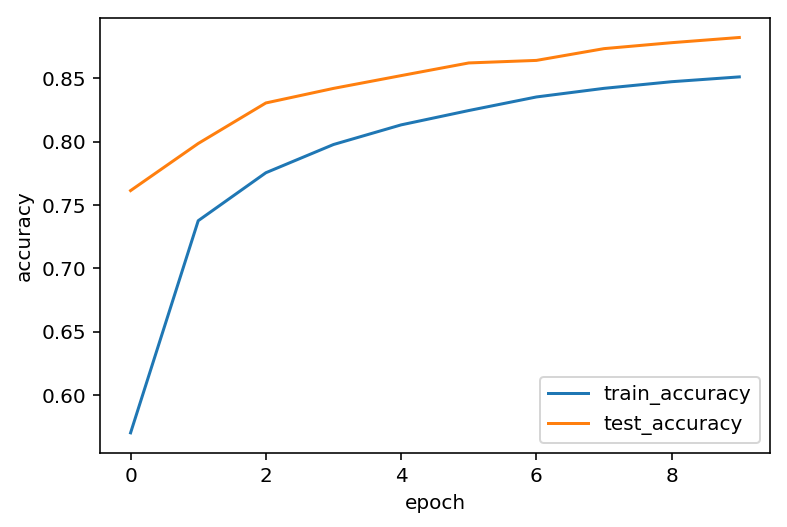

In [26]:
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)


In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred[0]

array([4.5509540e-07, 1.3830295e-06, 2.3285367e-08, 4.5330171e-07,
       1.6916177e-07, 5.4064335e-04, 2.1096194e-07, 9.9991569e-03,
       1.1464280e-05, 9.8944610e-01], dtype=float32)

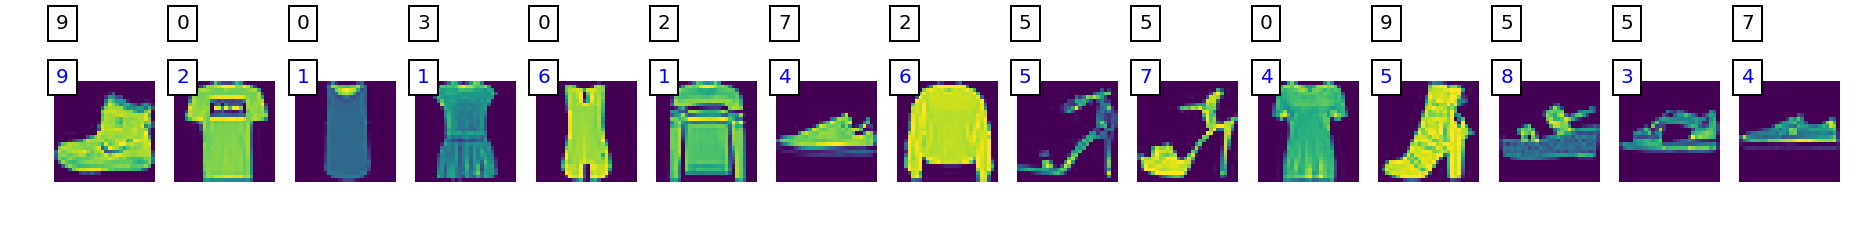

In [29]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='blue',  bbox=dict(facecolor='white', alpha=1))
    plt.text(0, -15, y_train[i].argmax(), color='black',  bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [30]:
# black original, blue pred 
y_pred_class = [np.argmax(i) for i in y_pred]
y_test_class = [np.argmax(i) for i in y_test]
from sklearn.metrics import classification_report
print (classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.82      0.84      0.83      1000
          1       0.99      0.97      0.98      1000
          2       0.79      0.83      0.81      1000
          3       0.89      0.90      0.90      1000
          4       0.78      0.82      0.80      1000
          5       0.98      0.96      0.97      1000
          6       0.71      0.61      0.66      1000
          7       0.94      0.94      0.94      1000
          8       0.97      0.98      0.98      1000
          9       0.94      0.96      0.95      1000

avg / total       0.88      0.88      0.88     10000



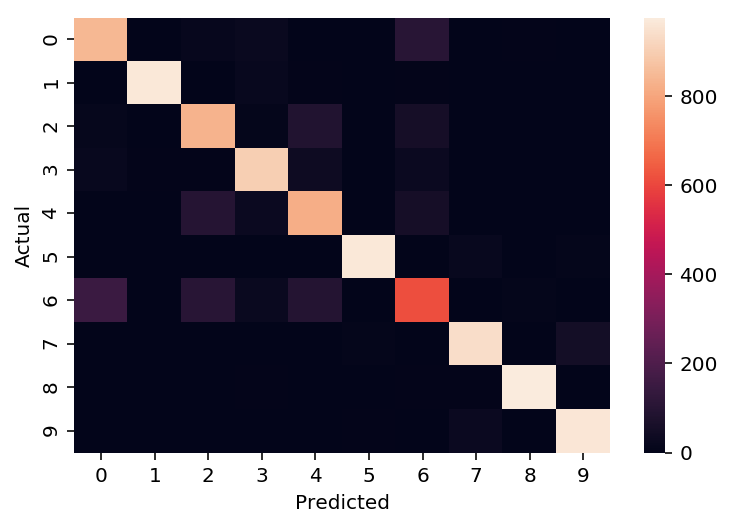

In [32]:
import seaborn as sns
y_test_ser = pd.Series(y_test_class, name='Actual')
y_pred_ser = pd.Series(y_pred_class, name='Predicted')
df_confusion = pd.crosstab(y_test_ser, y_pred_ser) #margins=True)
df_confusion
sns.heatmap(df_confusion)
